In [1]:
from scipy.constants import h, k as k_B
from physics.mkid import model

In [2]:
kid = model.KID(active_metal=model.Aluminum(T_c=0.8),
                active_volume_um3=1600,
                inactive_metal=None,
                inactive_volume_um3=0,
                substrate=model.Substrate(T=0.1),
                phonon_trapping_factor=2,
                alpha=0.25,
                f_r=3e9,
                iQc=30e-6,
                iQi0=1e-6,
                S_TLS_1_Hz_P_c=1e-19,
                P_c=1e-13)

In [8]:
# Optical system and environment

# Optical bandwidth, in Hz
bandwidth = (170 - 130) * 1e9

# Broadband center frequency, in Hz
nu_center = 150e9

# Background absorbed power, in W
P_B = 0.001e-12

# System optical efficiency (not implemented yet)
eta = 1

# Absorbed power, in W. Assume that the background has the same center frequency as the source optical power.
P_A = np.logspace(-14.9, -10.4, 1e4)
Gamma_A = kid.optical_generation_rate(P_A, nu_center)
Gamma_B = kid.optical_generation_rate(P_B, nu_center)

# Readout parameters

# Amplifier noise temperature, in K
T_amp = 4

# Readout power in W
internal_over_optical = 5
P_g = internal_over_optical * (P_A + P_B) / kid.chi_a(kid.iQi(Gamma_A + Gamma_B))

# Derived constants
print("\\Delta = {:.0f} ueV".format(1e6 * kid.active_metal.Delta_eV))

# Gap frequency
print("\\nu_g = {:.1f} GHz".format(1e-9 * kid.active_metal.nu_gap))

# Recombination constant
print("R = {:.1f} um^3 s^-1".format(kid.active_metal.R_um3_per_s))

# Effective recombination constant
print("R_* = {:.1f} um^3 s^-1".format(kid.effective_recombination_um3_per_s))

\Delta = 122 ueV
\nu_g = 58.8 GHz
R = 12.0 um^3 s^-1
R_* = 6.0 um^3 s^-1


# NEP

In [9]:
print("m_center = {:.2f}".format(kid.active_metal.quasiparticles_per_photon(nu_center)))
print("{:.2g} s^-1 <= Gamma_A <= {:.2g} s^-1".format(Gamma_A[0], Gamma_A[-1]))
print("Gamma_B = {:.2g} s^-1".format(Gamma_B))
print("Gamma_t = {:.2g} s^-1".format(kid.thermal_generation_rate))
Gamma = Gamma_A + Gamma_B + kid.thermal_generation_rate

m_center = 2.55
3.2e+07 s^-1 <= Gamma_A <= 1e+12 s^-1
Gamma_B = 2.6e+07 s^-1
Gamma_t = 8.3e+04 s^-1


In [10]:
# Plot parameters
P_A_scale = 1e12
photon_color = 'red'
recombination_color = 'blue'
amp_color = 'black'
TLS_color = 'brown'
nonamp_color = amp_color
nonphoton_color = photon_color
#total_color = 'black'

In [11]:
photon = kid.NEP2_photon(Gamma_A=Gamma_A, Gamma_B=Gamma_B, nu=nu_center, bandwidth=bandwidth)
recombination = kid.NEP2_recombination(Gamma=Gamma, nu=nu_center)
amplifier = kid.NEP2_amp(T_amp=T_amp, P_g=P_g, Gamma=Gamma, nu=nu_center)
TLS = kid.NEP2_TLS(P_g=P_g, Gamma=Gamma, nu=nu_center)
nonamp = photon + recombination + TLS
nonphoton = recombination + amplifier + TLS
total = photon + recombination + amplifier + TLS

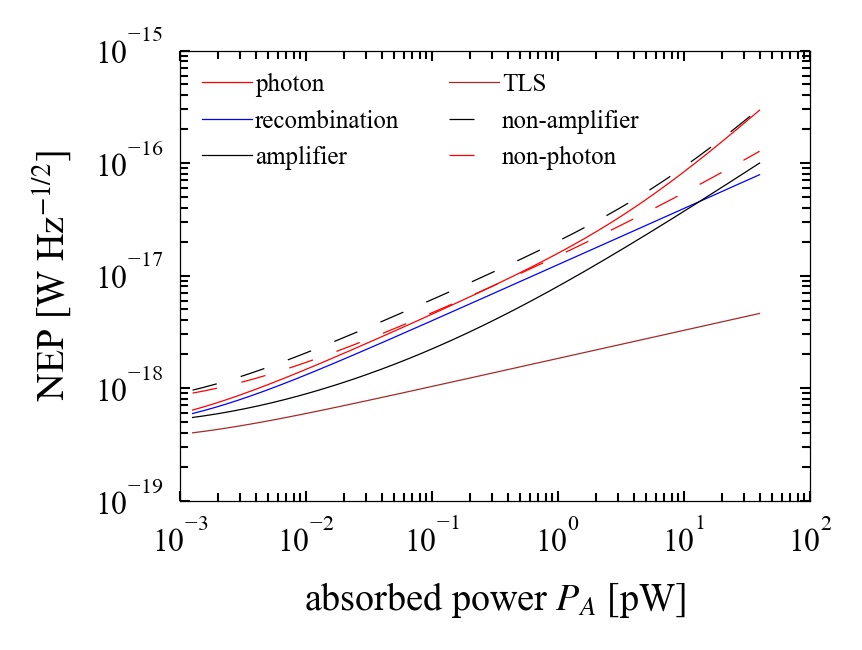

In [12]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('absorbed power $P_A$ [pW]')
ax.set_ylabel('NEP [W Hz$^{-1/2}$]')

ax.plot(P_A_scale * P_A,
        photon**(1/2),
        linestyle='-',
        color=photon_color, label='photon')

ax.plot(P_A_scale * P_A,
        recombination**(1/2),
        linestyle='-',
        color=recombination_color, label='recombination')

ax.plot(P_A_scale * P_A,
        amplifier**(1/2),
        linestyle='-',
        color=amp_color, label='amplifier')

ax.plot(P_A_scale * P_A,
        TLS**(1/2),
        linestyle='-',
        color=TLS_color, label='TLS')

ax.plot(P_A_scale * P_A,
        nonamp**(1/2),
        linestyle='--',
        color=nonamp_color, label='non-amplifier')

ax.plot(P_A_scale * P_A,
        nonphoton**(1/2),
        linestyle='--',
        color=nonphoton_color, label='non-photon')
"""
ax.plot(P_A_scale * P_A,
        total**(1/2),
        linestyle='--',
        color=total_color, label='total')
"""

ax.legend(loc='upper left', fontsize=6, ncol=2);

In [10]:
x_color = 'blue'
iQi_color = 'brown'
tau_qp_color = 'green'

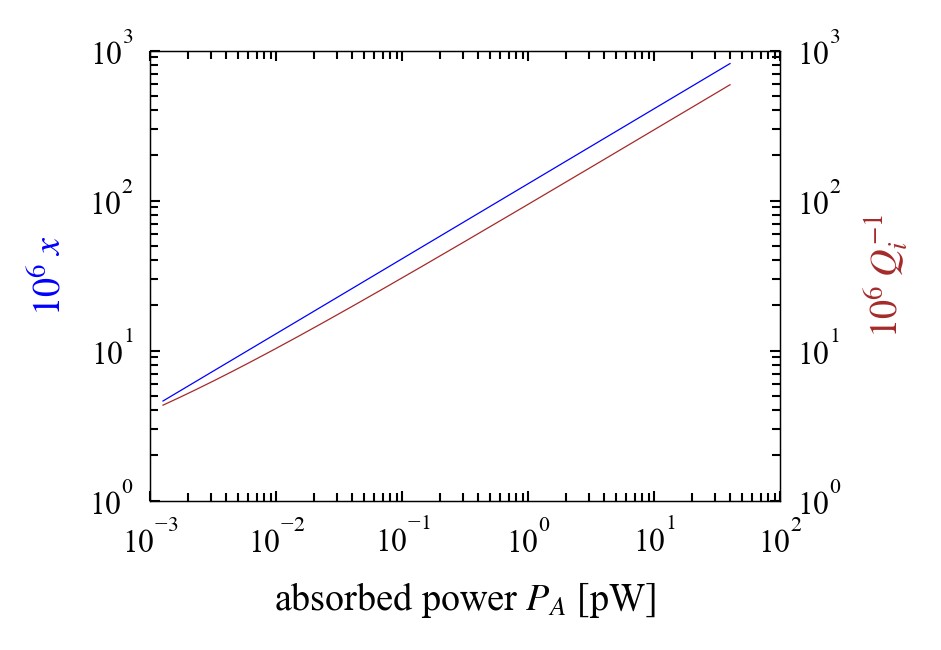

In [11]:
fig, x_ax = plt.subplots()
iQi_ax = x_ax.twinx()

x_ax.set_xscale('log')
x_ax.set_yscale('log')
iQi_ax.set_yscale('log')
x_ax.set_xlabel('absorbed power $P_A$ [pW]')
x_ax.set_ylabel('$10^6 \; x$', color=x_color)
iQi_ax.set_ylabel('$10^6 \; Q_i^{-1}$', color=iQi_color)

x_ax.plot(P_A_scale * P_A,
            1e6 * (kid.x(Gamma=Gamma) - kid.x(Gamma=Gamma_B)),
            color=x_color)

iQi_ax.plot(P_A_scale * P_A,
            1e6 * kid.iQi(Gamma=Gamma),
            color=iQi_color)

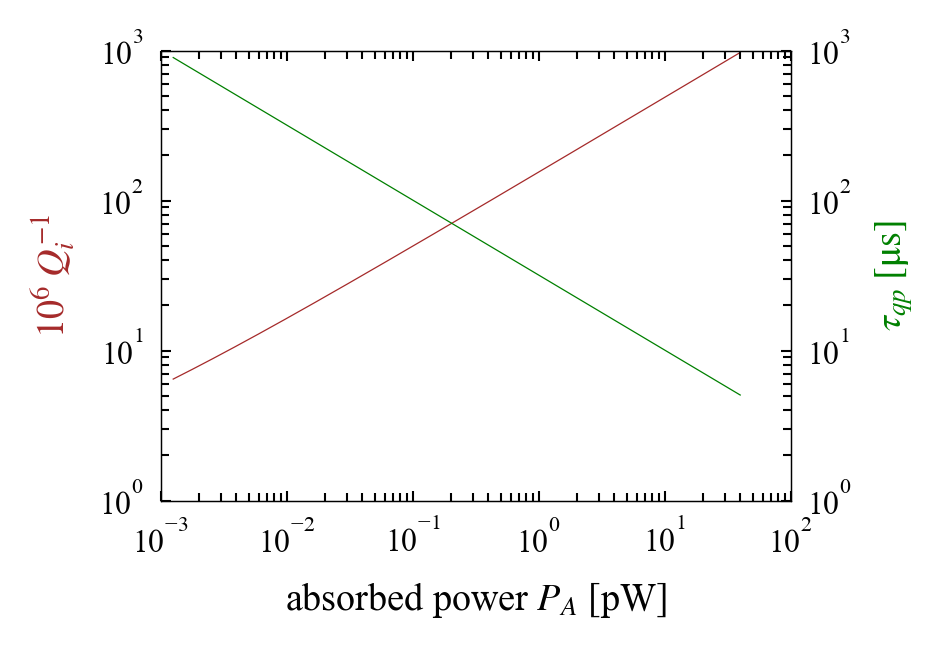

In [24]:
fig, iQi_ax = plt.subplots()
tau_qp_ax = iQi_ax.twinx()

iQi_ax.set_xscale('log')
iQi_ax.set_yscale('log')
tau_qp_ax.set_yscale('log')
iQi_ax.set_xlabel('absorbed power $P_A$ [pW]')
iQi_ax.set_ylabel('$10^6 \; Q_i^{-1}$', color=iQi_color)
tau_qp_ax.set_ylabel(r'$\tau_{qp} \; [\mathrm{\mu s}]$', color=tau_qp_color)

iQi_ax.plot(P_A_scale * P_A,
            1e6 * kid.iQi(Gamma=Gamma),
            color=iQi_color)

tau_qp_ax.plot(P_A_scale * P_A,
               1e6 * kid.tau_qp(Gamma=Gamma),
               color=tau_qp_color)


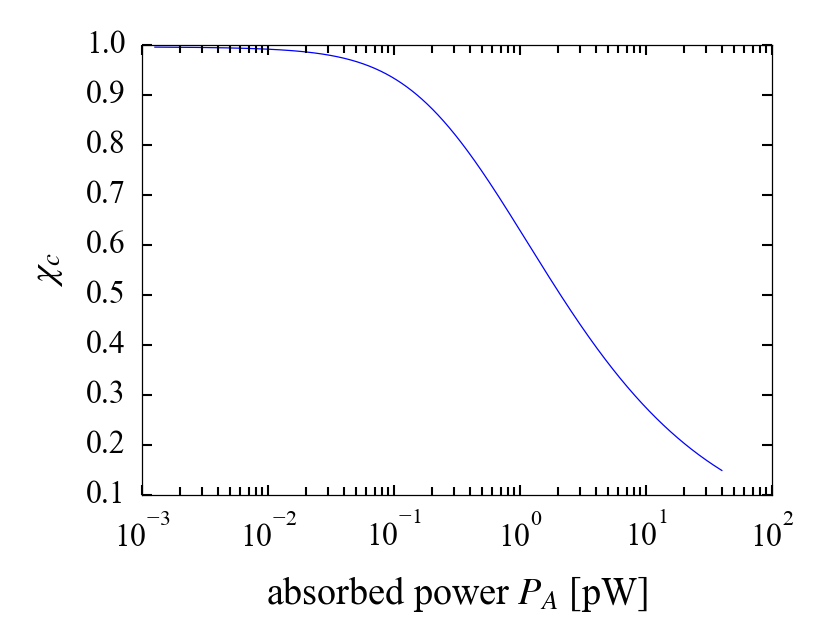

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel('absorbed power $P_A$ [pW]')
ax.set_ylabel(r'$\chi_c$')
ax.semilogx(P_A_scale * P_A,
            kid.chi_c(kid.iQi(Gamma)))

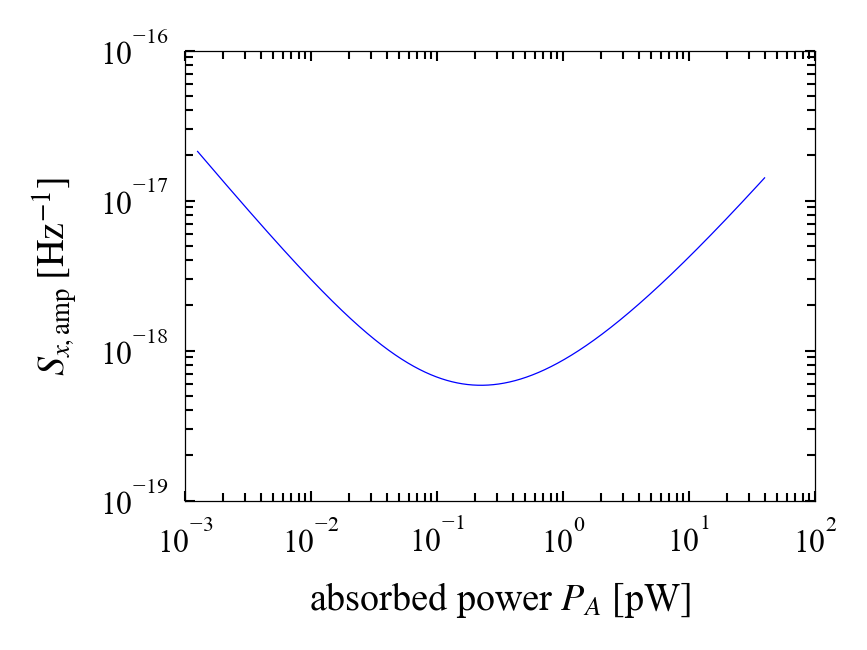

In [12]:
fig, ax = plt.subplots()
ax.set_xlabel('absorbed power $P_A$ [pW]')
ax.set_ylabel(r'$S_{x, \mathrm{amp}} \; [\mathrm{Hz}^{-1}]$')

ax.loglog(P_A_scale * P_A,
          (k_B * T_amp / P_g) / np.abs(kid.d_S21_d_x(kid.iQi(Gamma=Gamma)))**2)

# Generation efficiency

In [13]:
nu = np.linspace(0, 4 * kid.active_metal.nu_gap, 1e3)
nu = nu[1:]

In [14]:
eta_color = 'blue'
m_color = 'green'

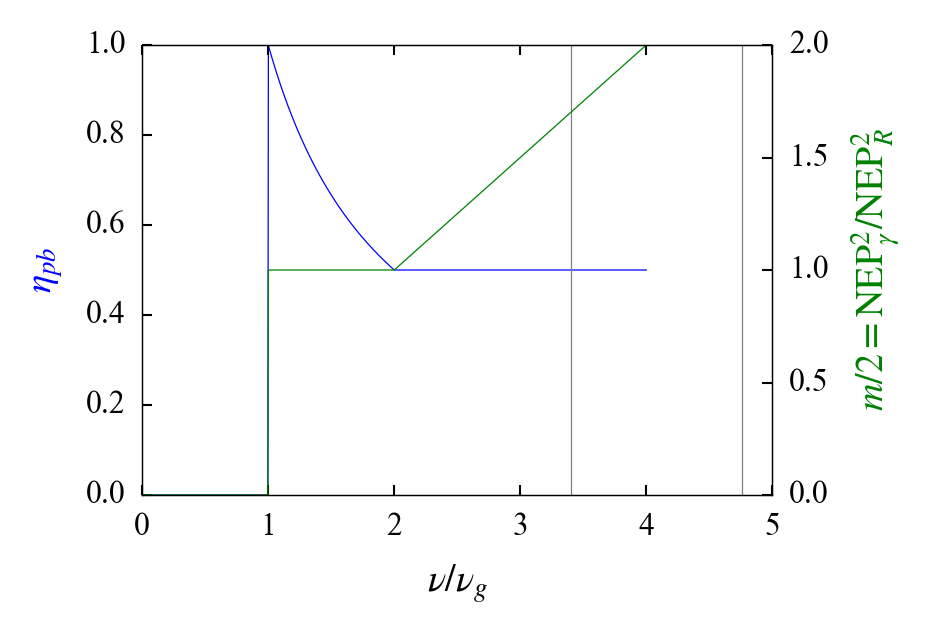

In [15]:
fig, eta_ax = plt.subplots()
m_ax = eta_ax.twinx()

eta_ax.plot(nu / kid.active_metal.nu_gap,
            [kid.active_metal.eta_pb(n) for n in nu],
            color=eta_color)
eta_ax.set_xlabel(r'$\nu / \nu_g$')
eta_ax.set_ylabel(r'$\eta_{pb}$', color=eta_color)
m_ax.plot(nu / kid.active_metal.nu_gap,
          [kid.active_metal.quasiparticles_per_photon(n) / 2 for n in nu],
          color=m_color)
m_ax.set_ylabel('$m / 2 = \mathrm{NEP}_\gamma^2 / \mathrm{NEP}_R^2$',
                color=m_color)

eta_ax.axvline(125e9 / kid.active_metal.nu_gap, color='gray')
eta_ax.axvline(175e9 / kid.active_metal.nu_gap, color='gray')